In [4]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [208]:
train_losses = []
for epoch in range(600):
    train_losses.append(pickle.load(
        open('MNIST_DEBUG_DIFFEO/results/P_STN_MNIST100_0.5_fold_0/train_loss_epoch_%s.p'%epoch, 'rb')))
    
reg_terms = []
for epoch in range(600):
    reg_terms.append(pickle.load(
        open('MNIST_DEBUG_DIFFEO/results/P_STN_MNIST100_0.5_fold_0/train_reg_term_epoch_%s.p'%epoch, 'rb')))

## Problem: model seems extremely sensitive to prior
-> this is a problem in itself but also leads us to bias the mean transformations toward 0

(-0.1, 2.4)

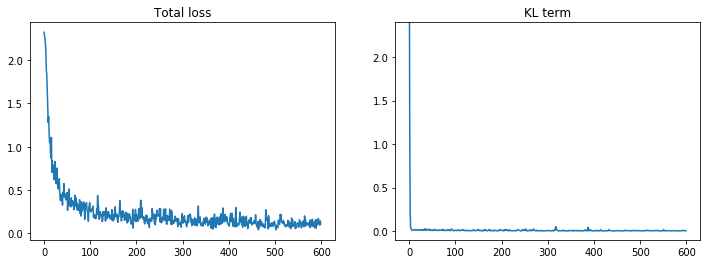

In [209]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(train_losses)
ax[0].set_title('Total loss')
ax[1].plot(reg_terms)
ax[1].set_title('KL term')
ax[1].set_ylim([-0.1, 2.4])

In [ ]:
! ls ../pSTN-baselines/theta_stats/

In [214]:
def load_means_and_variances(path, load_variance=True):
    mu = pickle.load(
        open(path + '_mu.p', 'rb'))
    nr_params = mu.shape[-1]
    print(mu.shape)
    mu = mu.reshape([-1, nr_params])
    
    sigma= None
    if load_variance:
        sigma = pickle.load(
            open(path + '_sigma.p', 'rb'))
        sigma = sigma.reshape([-1, nr_params])
    return mu, sigma

In [215]:
def plot_mu_affine(data):
    fig, ax = plt.subplots(2,2, figsize=(8, 8))
    ax[0, 0].hist(mu[:,0], bins=15);
    ax[0, 0].axvline(0, c='k', linestyle='dotted')

    ax[0, 1].hist(mu[:,1], bins=15);
    ax[0, 1].axvline(1, c='k', linestyle='dotted')

    ax[1, 0].hist(mu[:,2], bins=15);
    ax[1, 0].axvline(0, c='k', linestyle='dotted')

    ax[1, 1].hist(mu[:,3], bins=15);
    ax[1, 1].axvline(0, c='k', linestyle='dotted')
    
def plot_sigma_affine(sigma):
    fig, ax = plt.subplots(2,2, figsize=(8, 8))
    ax[0, 0].hist(sigma[:,0], bins=15);
    ax[0, 0].axvline(0.1, c='k', linestyle='dotted')

    ax[0, 1].hist(sigma[:,1], bins=15);
    ax[0, 1].axvline(0.1, c='k', linestyle='dotted')

    ax[1, 0].hist(sigma[:,2], bins=15);
    ax[1, 0].axvline(0.1, c='k', linestyle='dotted')

    ax[1, 1].hist(sigma[:,3], bins=15);
    ax[1, 1].axvline(0.1, c='k', linestyle='dotted')
    
def plot_params_jointly(params, affine=False, subtract_scale=True):
    nr_params = params.shape[1]
    labels = ['$p_%s$'%i for i in range(nr_params)]
    fig, ax = plt.subplots(1, figsize=(6, 4))
    if affine:
        labels = ['r', 's', '$t_x$', '$t_y$']
    if subtract_scale:
        params[:, 1] -= 1
    for i in range(nr_params):
        ax.hist(params[:, i], bins=15, rwidth=0.6, label=labels[i]);
        plt.legend()

In [188]:
path = '../pSTN-baselines/theta_stats/d=MNIST100-m=pstn-b=None-n=1-p=4-fold=1-kl=no_annealing-seed=42-sigmaP=0.4-lr=0.001-lrloc=1.0'
mnist_pstn_mu, mnist_pstn_sigma = load_means_and_variances(path)

(1250, 8, 4)


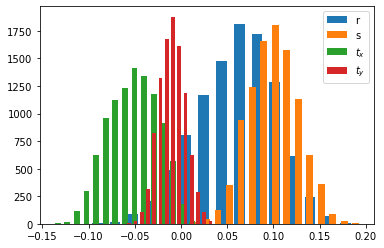

In [189]:
plot_params_jointly(mnist_pstn_mu, affine=True, subtract_scale=True)

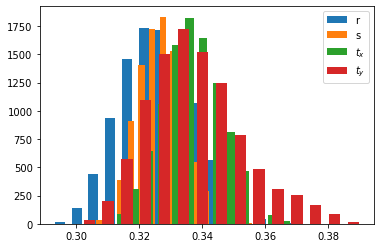

In [190]:
plot_params_jointly(mnist_pstn_sigma, affine=True, subtract_scale=False)

In [201]:
path = '../pSTN-baselines/theta_stats/d=uWaveGestureLibrary_X-m=pstn-b=None-n=1-p=9-fold=4-kl=no_annealing-seed=42-sigmaP=0.1-lr=0.001-lrloc=0.1'
pstn_mu, pstn_sigma = load_means_and_variances(path)

(223, 16, 9)


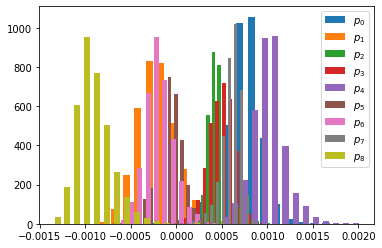

In [202]:
plot_params_jointly(pstn_mu, affine=False, subtract_scale=False)

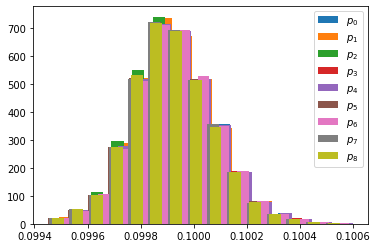

In [203]:
plot_params_jointly(pstn_sigma, affine=False, subtract_scale=False)

In [211]:
! ls ../pSTN-baselines/theta_stats/d=uWaveGestureLibrary_X-m=stn*

'../pSTN-baselines/theta_stats/d=uWaveGestureLibrary_X-m=stn-b=None-n=1-p=9-fold=0-kl=None-seed=42-sigmaP=0.1-lr=0.001-lrloc=0.1_mu.p'
'../pSTN-baselines/theta_stats/d=uWaveGestureLibrary_X-m=stn-b=None-n=1-p=9-fold=1-kl=None-seed=42-sigmaP=0.1-lr=0.001-lrloc=0.1_mu.p'
'../pSTN-baselines/theta_stats/d=uWaveGestureLibrary_X-m=stn-b=None-n=1-p=9-fold=2-kl=None-seed=42-sigmaP=0.1-lr=0.001-lrloc=0.1_mu.p'
'../pSTN-baselines/theta_stats/d=uWaveGestureLibrary_X-m=stn-b=None-n=1-p=9-fold=3-kl=None-seed=42-sigmaP=0.1-lr=0.001-lrloc=0.1_mu.p'
'../pSTN-baselines/theta_stats/d=uWaveGestureLibrary_X-m=stn-b=None-n=1-p=9-fold=4-kl=None-seed=42-sigmaP=0.1-lr=0.001-lrloc=0.1_mu.p'
'../pSTN-baselines/theta_stats/d=uWaveGestureLibrary_X-m=stn-b=None-n=1-p=9-fold=5-kl=None-seed=42-sigmaP=0.1-lr=0.001-lrloc=0.1_mu.p'


In [216]:
path = '../pSTN-baselines/theta_stats/d=uWaveGestureLibrary_X-m=stn-b=None-n=1-p=9-fold=0-kl=None-seed=42-sigmaP=0.1-lr=0.001-lrloc=0.1'
stn_mu, stn_sigma = load_means_and_variances(path, load_variance=False)

(223, 9)


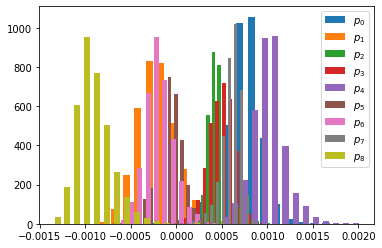

In [219]:
plot_params_jointly(pstn_mu, affine=False, subtract_scale=False)

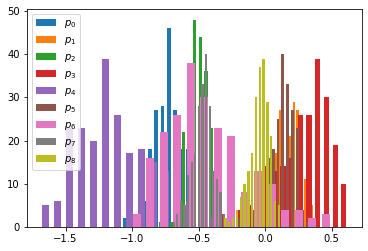

In [217]:
plot_params_jointly(stn_mu, affine=False, subtract_scale=False)